### 1. Load and Preview the Dataset

In this first step, we load the cleaned version of the German Credit dataset and inspect its structure. We check the shape (rows and columns) and print the list of features to understand what variables are available for analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/cleaned.csv")

# Style configuration
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Dimention and columns 
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

### 2. Distribution of the Target Variable

We analyze the class distribution of the target variable (`Target`), which indicates whether a customer is considered a good (0) or bad (1) credit risk. This helps us check for class imbalance, which can affect model performance.


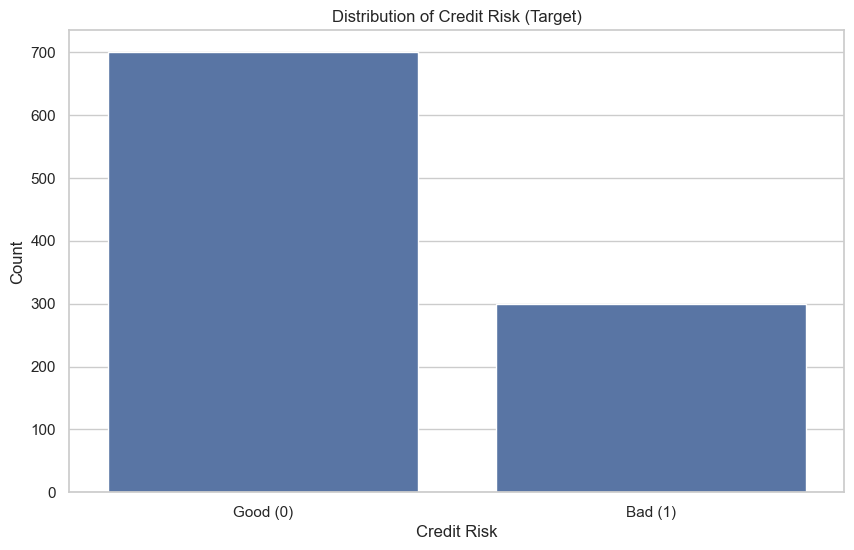

In [ ]:
sns.countplot(x="Target", data=df)
plt.title("Distribution of Credit Risk (Target)")
plt.xticks([0, 1], ["Good (0)", "Bad (1)"])
plt.ylabel("Count")
plt.xlabel("Credit Risk")
plt.show()

### 3. Descriptive Statistics for Numerical Variables

We calculate summary statistics (mean, std, min, max, etc.) for the numerical features. This helps identify variables with high variance, outliers, or potential data quality issues.


In [ ]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Target")
display(df[num_cols].describe())

,Duration_month,Credit_amount,Installment_rate,Residence_since,Age,Existing_credits,Dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### 4. Distributions of Numerical Features by Credit Risk

For each numerical variable, we plot histograms separated by credit risk. This shows how each variable is distributed and whether the distributions differ between good and bad credit profiles.


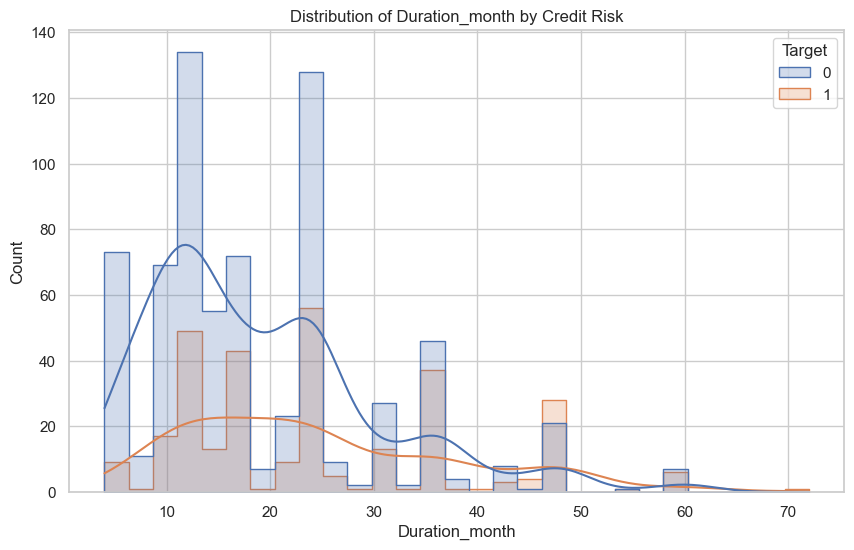

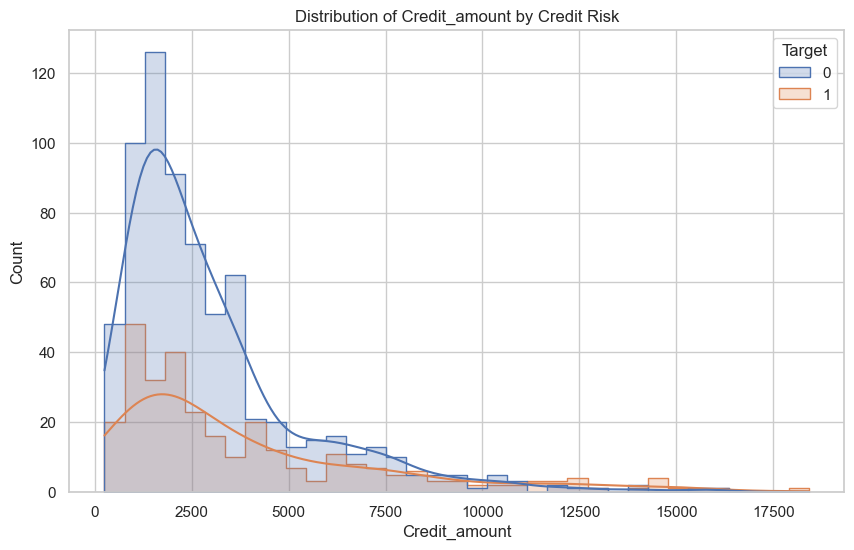

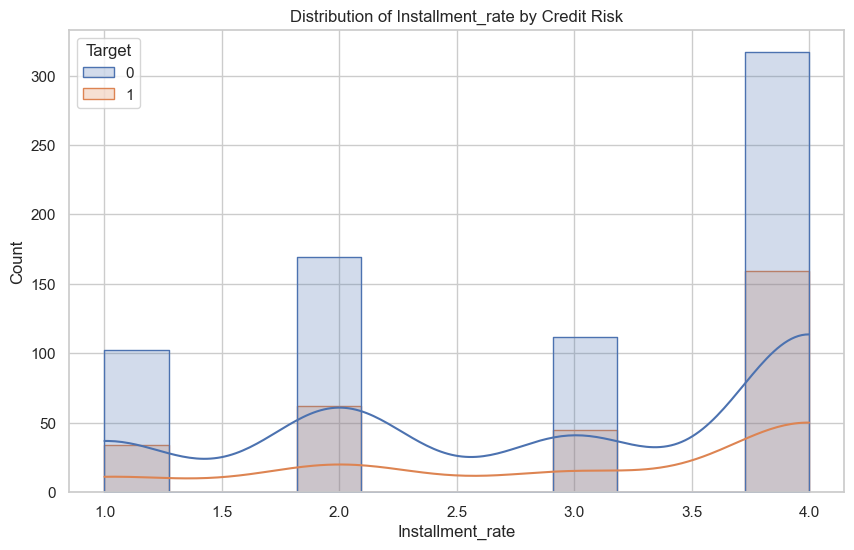

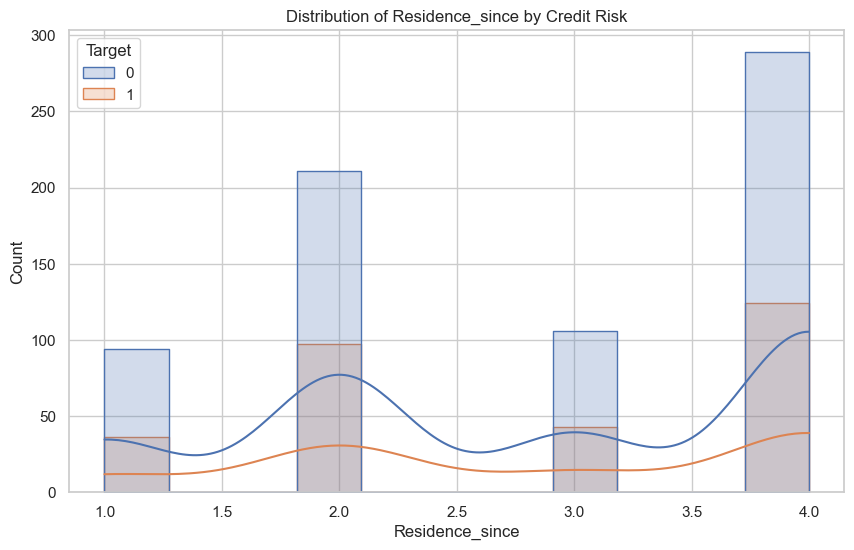

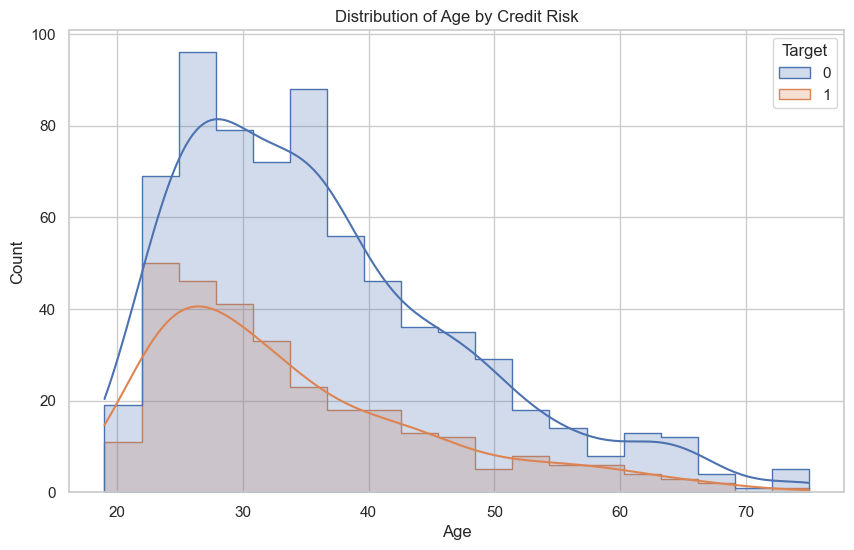

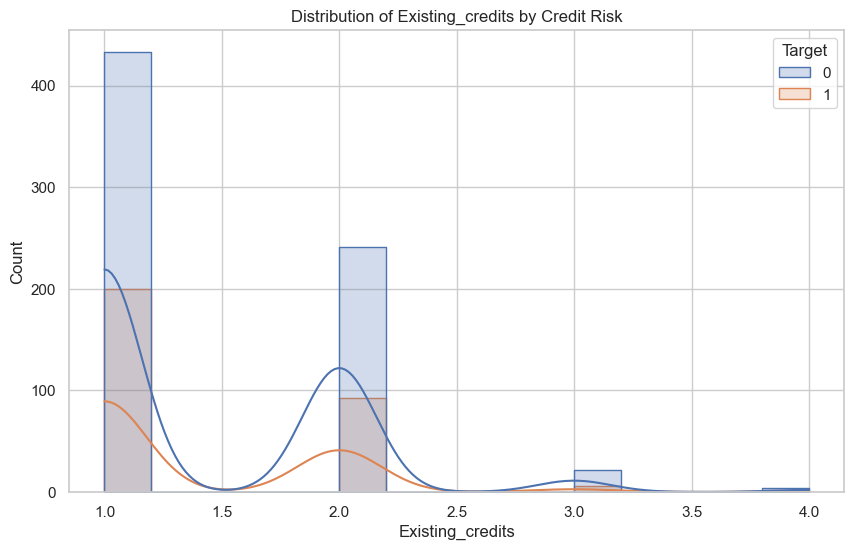

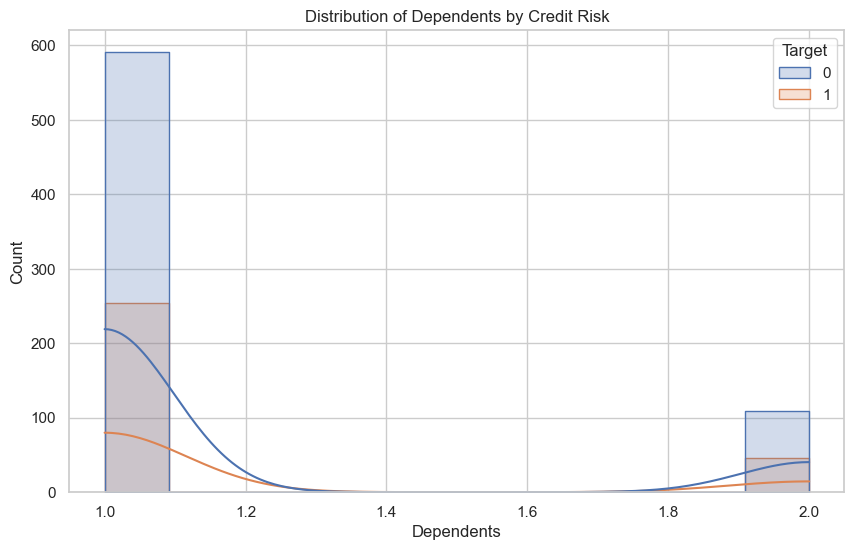

In [ ]:
for col in num_cols:
    sns.histplot(data=df, x=col, hue="Target", kde=True, element="step")
    plt.title(f"Distribution of {col} by Credit Risk")
    plt.show()

### 5. Boxplots: Numerical Features vs Credit Risk

We use boxplots to visualize the range and median of each numerical variable across the two credit risk classes. This can help spot differences in location, spread, and outliers between the classes.


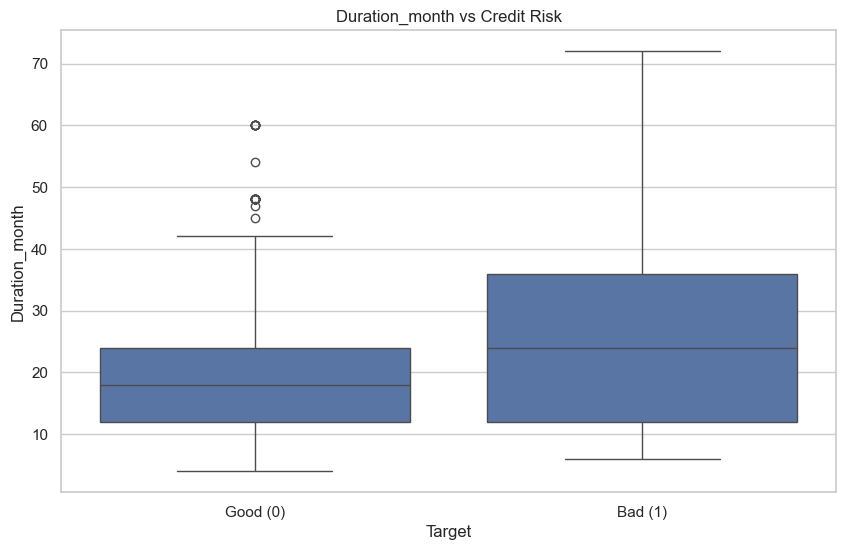

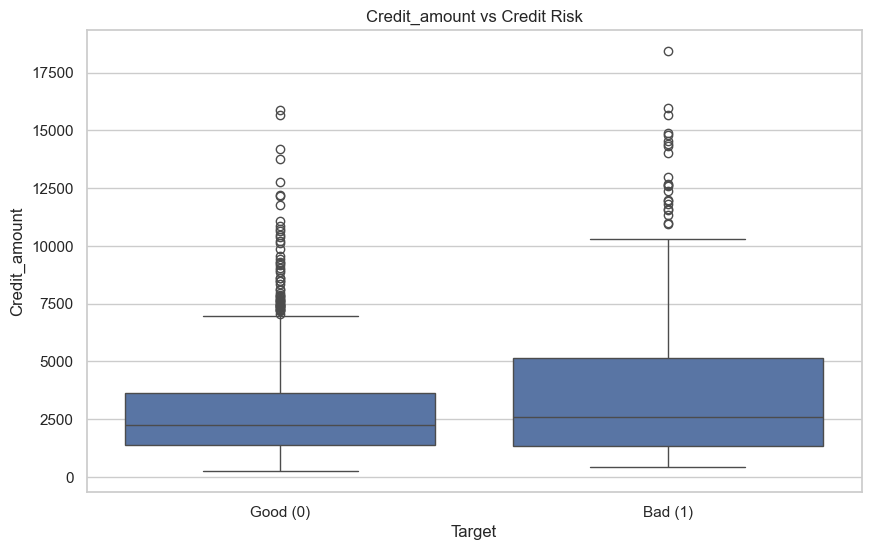

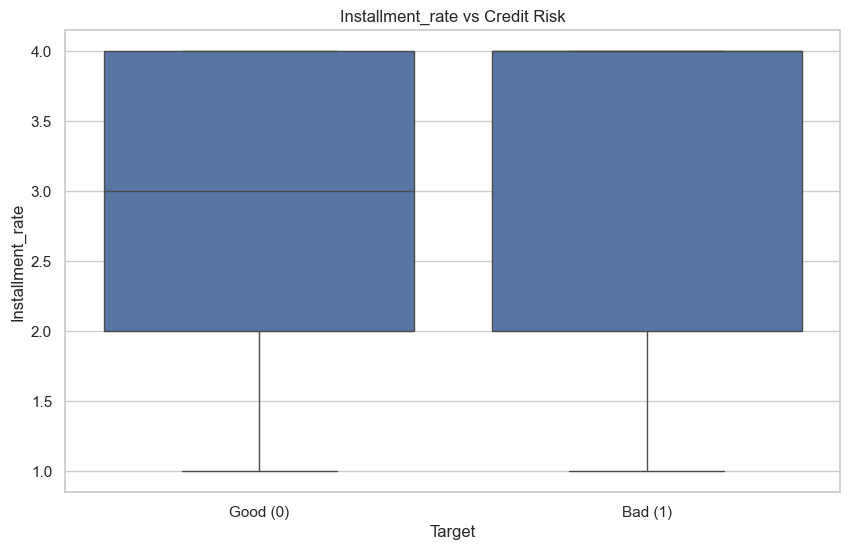

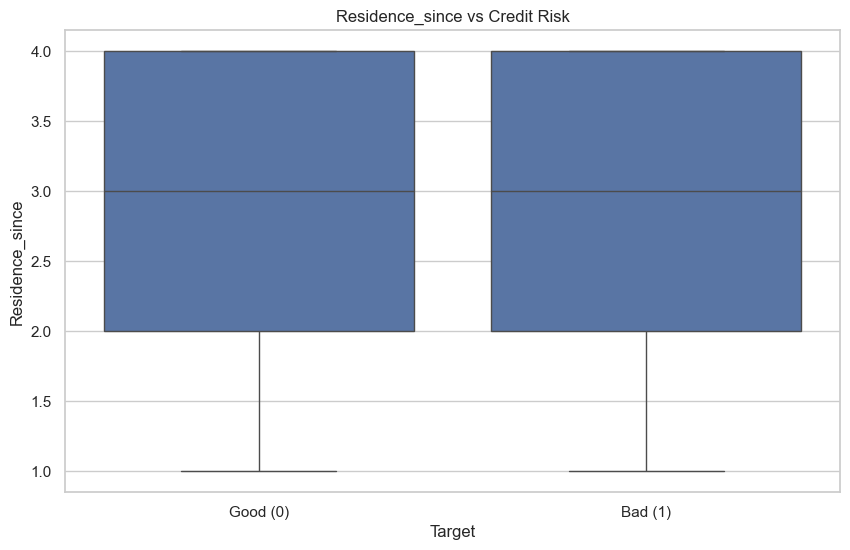

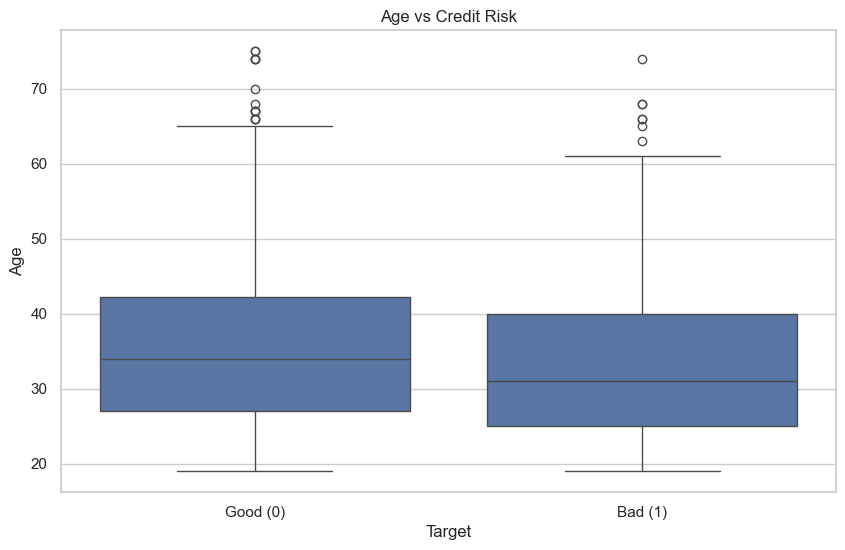

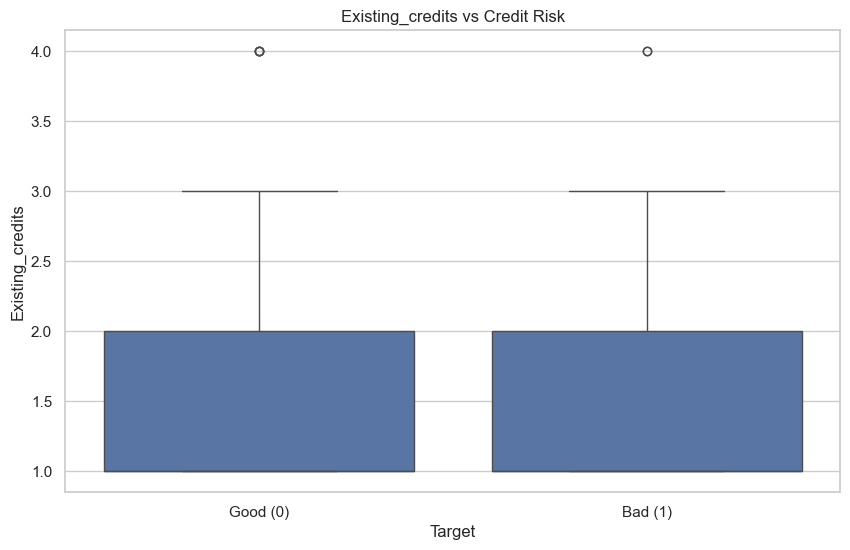

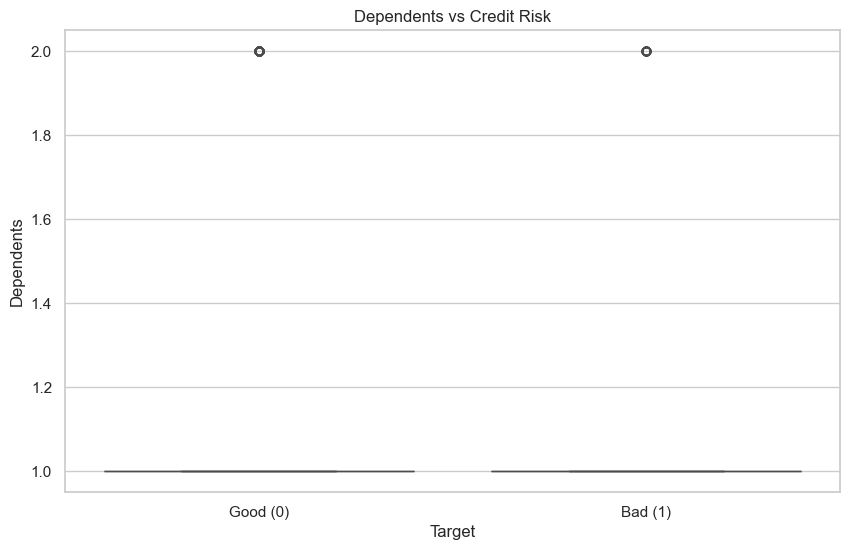

In [ ]:
for col in num_cols:
    sns.boxplot(x="Target", y=col, data=df)
    plt.title(f"{col} vs Credit Risk")
    plt.xticks([0, 1], ["Good (0)", "Bad (1)"])
    plt.show()

### 6. Categorical Features by Credit Risk

We plot the frequency of each category in the categorical variables, separated by credit risk. This allows us to identify patterns such as certain categories being associated with higher or lower risk.


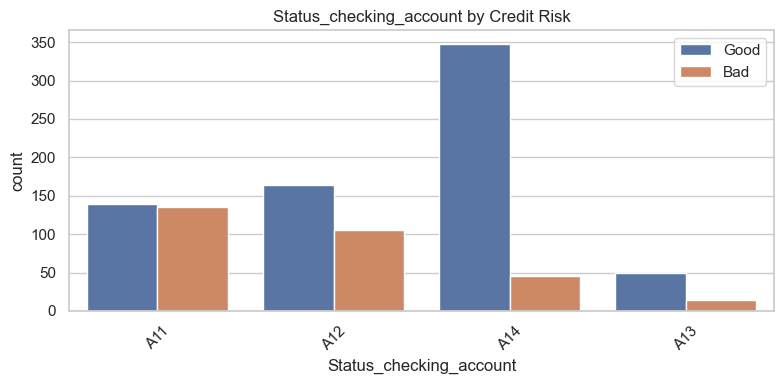

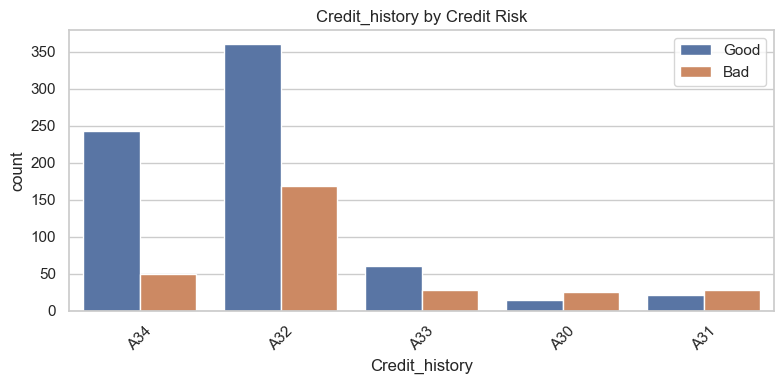

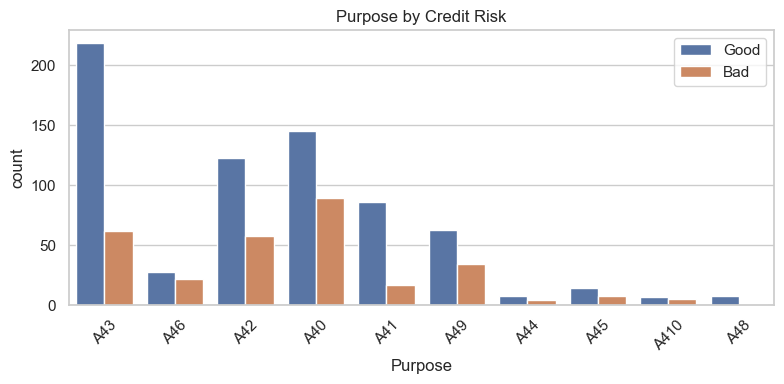

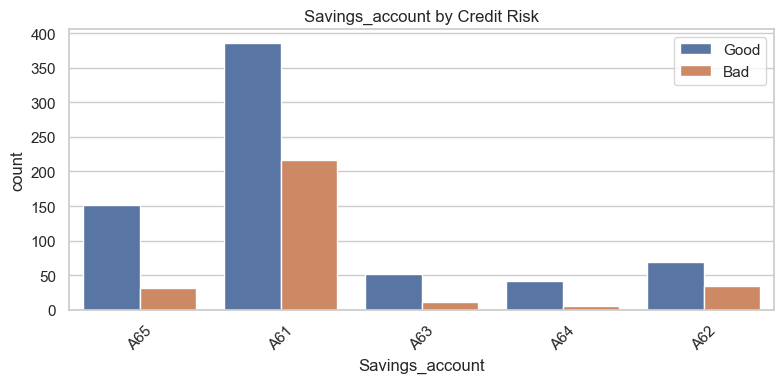

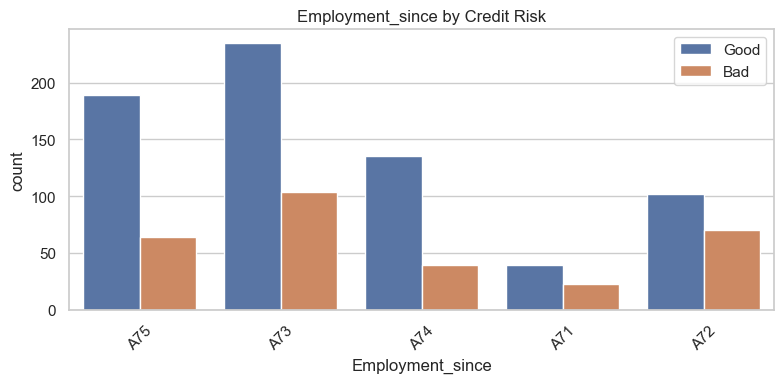

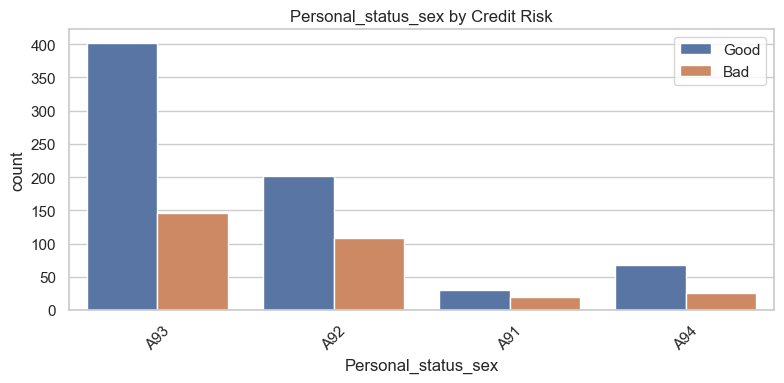

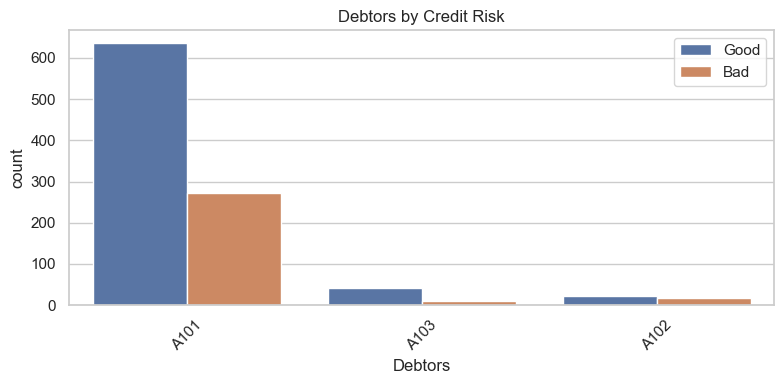

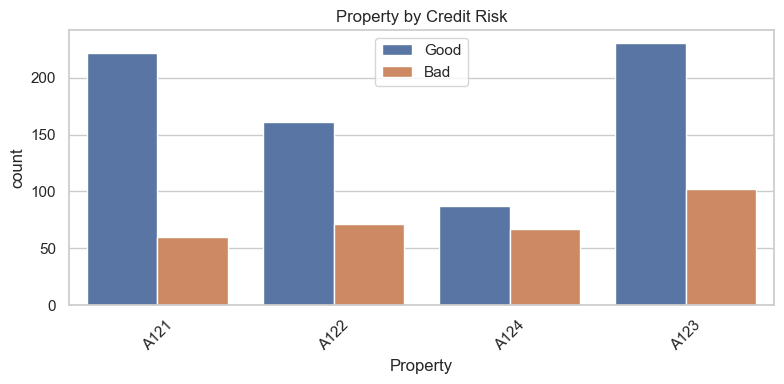

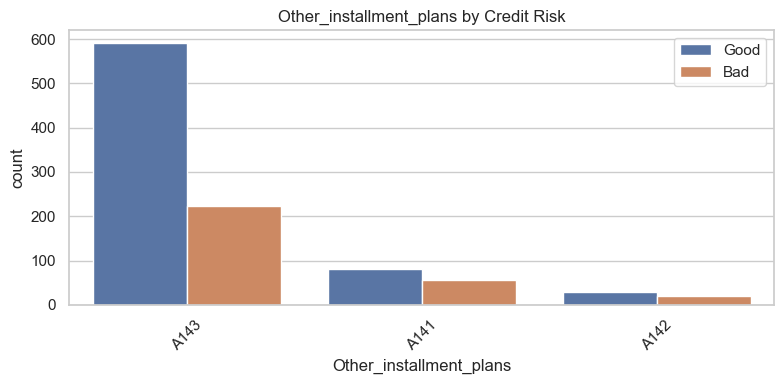

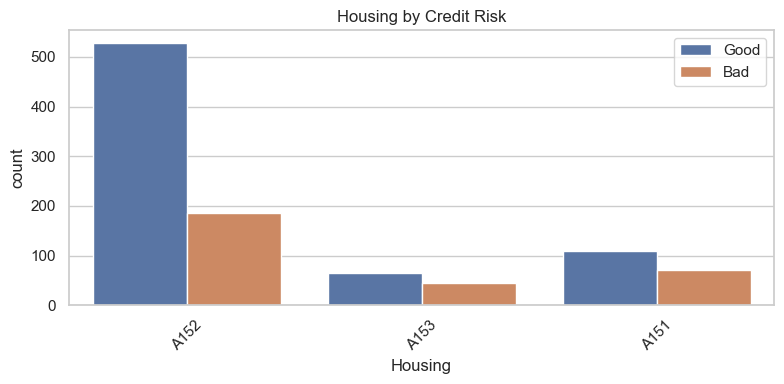

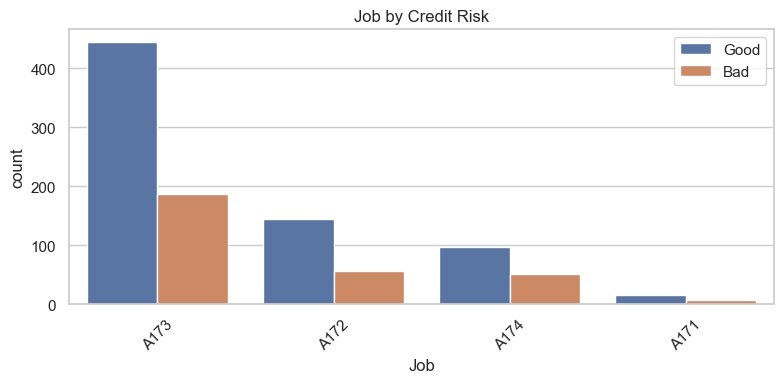

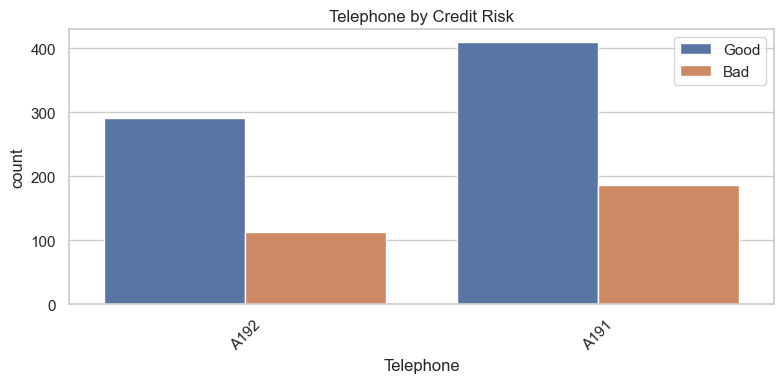

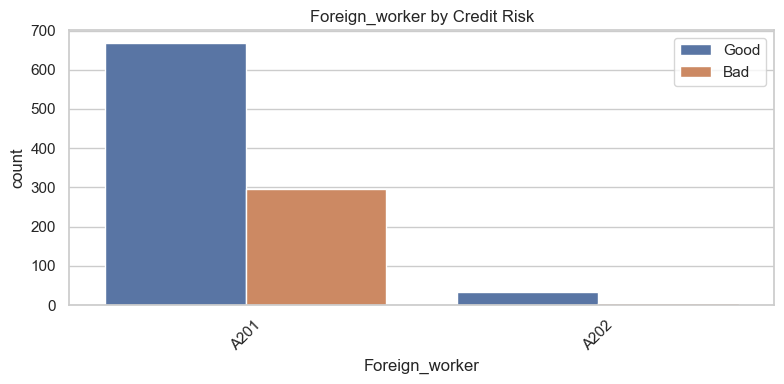

In [ ]:
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue="Target")
    plt.title(f"{col} by Credit Risk")
    plt.xticks(rotation=45)
    plt.legend(["Good", "Bad"])
    plt.tight_layout()
    plt.show()

### Summary of Insights

After exploring the dataset:
- We confirm whether the dataset is balanced or imbalanced.
- We identify variables that may be predictive of credit risk (e.g. `Credit_amount`, `Duration_month`, etc.).
- We take note of any potential issues to address in preprocessing, such as outliers or irrelevant features.

These findings will guide the feature engineering and model selection steps in the next phase.
